In [1]:
# import all the libraries needed to build a toxicity classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


In [2]:
# read in a csv file named "toxicity.csv"
toxicity = pd.read_csv("toxicity.csv")

In [3]:
# display the toxicity file
toxicity.head()

,text,is_toxic
0,"Elon Musk is a piece of shit, greedy capitalis...",Toxic
1,The senile credit card shrill from Delaware ne...,Toxic
2,He does that a lot -- makes everyone look good...,Toxic
3,F*ck Lizzo,Toxic
4,Epstein and trump were best buds!!! Pedophiles...,Toxic


In [8]:
# how many examples are there of each class?
toxicity.groupby('target').count()

In [5]:
# the 'is_toxic' column contains the label to be predicted. how many examples of each type are there?
toxicity['is_toxic'].value_counts()

Toxic        501
Not Toxic    499
Name: is_toxic, dtype: int64

<AxesSubplot:>

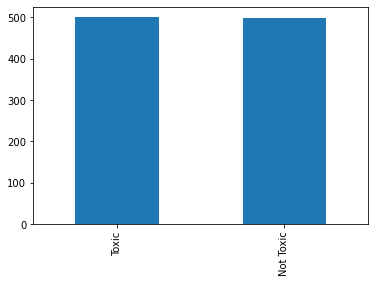

In [6]:
# create a bar chart of the number of examples of each class
toxicity['is_toxic'].value_counts().plot(kind='bar')

Text(0.5, 0, 'is_toxic')

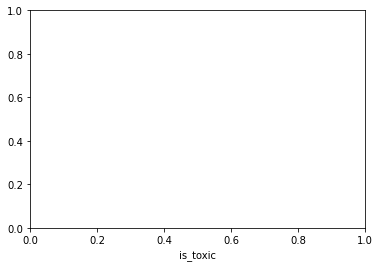

In [7]:
# flip the axes of the bar chart
plt.xlabel('is_toxic')

<AxesSubplot:>

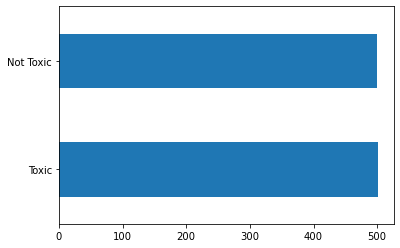

In [9]:
# create a bar chart of the number of examples of each class, 
# but with the coordinates flipped
toxicity['is_toxic'].value_counts().plot(kind='barh')

<AxesSubplot:>

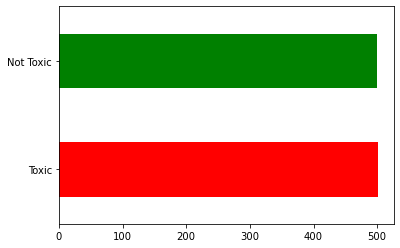

In [10]:
# create a bar chart of the number of examples of each class,
# but with the coordinates flipped, with the Toxic bar colored red
# and the Not Toxic bar colored green
toxicity['is_toxic'].value_counts().plot(kind='barh', color=['red', 'green'])

<AxesSubplot:title={'center':'Toxicity Dataset Breakdown'}>

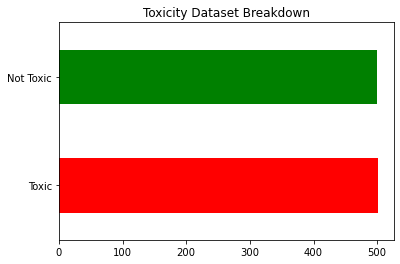

In [11]:
# create a bar chart of the number of examples of each class,
# but with the coordinates flipped, with the Toxic bar colored red
# and the Not Toxic bar colored green, and give the chart a title
# of "Toxicity Dataset Breakdown"
toxicity['is_toxic'].value_counts().plot(kind='barh', color=['red', 'green'], title='Toxicity Dataset Breakdown')

In [12]:
# build a classifier that predicts the 'is_toxic' column given the 'text' column
# using a Naive Bayes classifier

In [13]:
# create a pipeline that uses the CountVectorizer and MultinomialNB classifiers
# to predict the 'is_toxic' column given the 'text' column
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


In [14]:
# use the pipeline to classify
pipeline.fit(toxicity['text'], toxicity['is_toxic'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [15]:
# predict the toxicity of a new text
prediction = pipeline.predict(['this is a toxic comment'])

In [16]:
# print the prediction
print(prediction)

['Not Toxic']


In [17]:
# generate an array of toxic and non-toxic comments
comments = ['this is a toxic comment', 'this is a non-toxic comment']

In [18]:
# create an array with the following toxic comments: "fuck you!", "you're so stupid", "go kys duckwad"
toxic_comments = ['fuck you!', 'you\'re so stupid', 'go kys duckwad']

In [35]:
# classify the toxic_commenst and print out the predictions
print(pipeline.predict(toxic_comments))

['Toxic' 'Toxic' 'Toxic']


In [19]:
# create an array with the following non-toxic comments: "i love you", "she's amazing"
non_toxic_comments = ['i love you', 'she\'s amazing']

In [20]:
# classify the non-toxic comments and print out the predictions
print(pipeline.predict(non_toxic_comments))

['Not Toxic' 'Not Toxic']


In [21]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(toxicity['text'], toxicity['is_toxic'], test_size=0.2, random_state=42)

In [22]:
# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [23]:
# predict the labels of the testing data
y_pred = pipeline.predict(X_test)

In [24]:
# score the model on the testing data
print(pipeline.score(X_test, y_test))

0.89


In [25]:
# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Not Toxic       0.93      0.86      0.89       104
       Toxic       0.86      0.93      0.89        96

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [61]:
# plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


ValueError: y_true takes value in {'Not Toxic', 'Toxic'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [26]:
# y_test takes values in {"Toxic", "Not Toxic"}. turn it into an array where Toxic is 1 and Not Toxic is 0
y_test = y_test.map({'Toxic': 1, 'Not Toxic': 0})

In [27]:
# generate numerical predictions from X_test
y_pred = pipeline.predict_proba(X_test)[:, 1]

In [28]:
# plot a precision-recall curve using y_test and y_pred
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

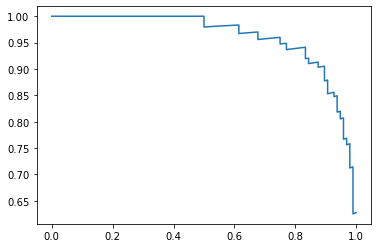

In [29]:
# plot the PR curve
plt.plot(recall, precision)

Text(0.5, 0.5, 'AUC: 0.9608')

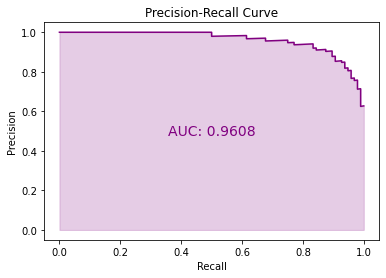

In [30]:
# plot the PR curve with the axes labeled, make it purple, and add a title
plt.plot(recall, precision, color='purple', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# color the area under the curve purple
plt.fill_between(recall, precision, alpha=0.2, color='purple')

# write the AUC on the plot in the middle
plt.text(0.5, 0.5, 'AUC: %.4f' % auc(recall, precision), horizontalalignment='center',
    verticalalignment='center', fontsize=14, color='purple')